<a href="https://colab.research.google.com/github/Somali2424/Loan_Default_Prediction_Part_2/blob/main/Loan_Default_Prediction_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score,recall_score, f1_score,confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt, numpy as np

# Importing classifiers
from sklearn.linear_model import LogisticRegression,RidgeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Now we are importing the dataset
df = pd.read_csv('Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [3]:
df=df.set_index('Index')
df

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0
...,...,...,...,...
9996,1,8538.72,635908.56,0
9997,1,9095.52,235928.64,0
9998,1,10144.92,703633.92,0


Defaulted? is the target variable where 0 represents those who didn't default and 1 represents those who defaulted


In [4]:
#Creating new features

In [5]:
# we are performing some feature engineering to increase performance. Feature engineering is done through increasing the number of features

create a new Savings Ratio feature, which can be found by dividing the bank balance by the annual salary. A savings ratio in the context of loan default is useful to know how financially stable a client is and this may indicate that those who have a higher savings ratio may be less likely to default, as they have greater ability to pay.

In [6]:
df['Savings Ratio']=(df['Bank Balance']/df['Annual Salary'])*100
df

,Employed,Bank Balance,Annual Salary,Defaulted?,Savings Ratio
Index,,,,,
1,1,8754.36,532339.56,0,1.644507
2,0,9806.16,145273.56,0,6.750134
3,1,12882.60,381205.68,0,3.379435
4,1,6351.00,428453.88,0,1.482307
5,1,9427.92,461562.00,0,2.042612
...,...,...,...,...,...
9996,1,8538.72,635908.56,0,1.342759
9997,1,9095.52,235928.64,0,3.855200
9998,1,10144.92,703633.92,0,1.441790


Correlation Analysis

Correlation analysis will help us to find out if there is any linear relatioship among the variables or not

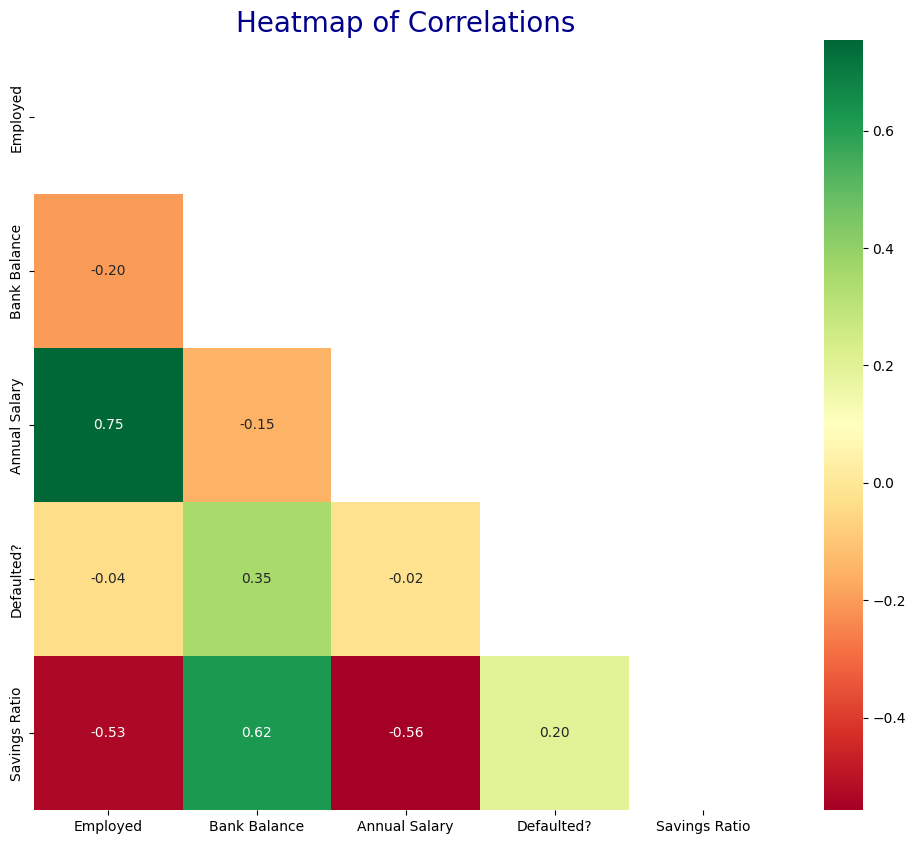

In [ ]:
# Creating a correlation heatmap with seaborn
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, mask = mask, annot=True,cmap='RdYlGn', fmt = '.2f')
ax.set_title('Heatmap of Correlations', fontsize = 20, color = 'darkblue')
plt.show()

A 62% correlation between Bank Balance and Savings Ratio also shows us a moderate positive correlation between both features, indicating that the higher the amount in the account, the higher is the savings ratio of that client

Visual Analysis

Visual analysis helps us gather more information on data such as relationship among features and also to check how data is distributed

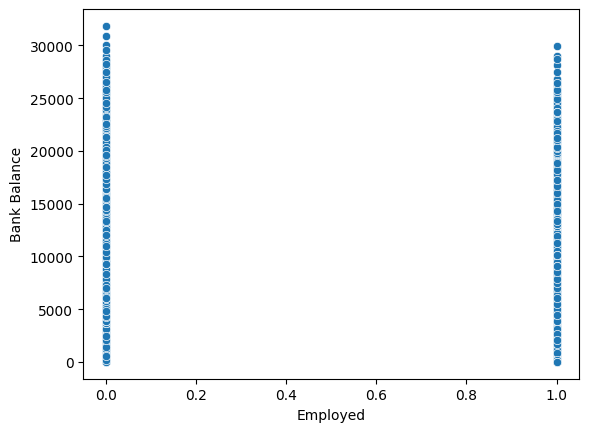

In [7]:
sns.scatterplot(x='Employed',y='Bank Balance',data=df)
plt.show()

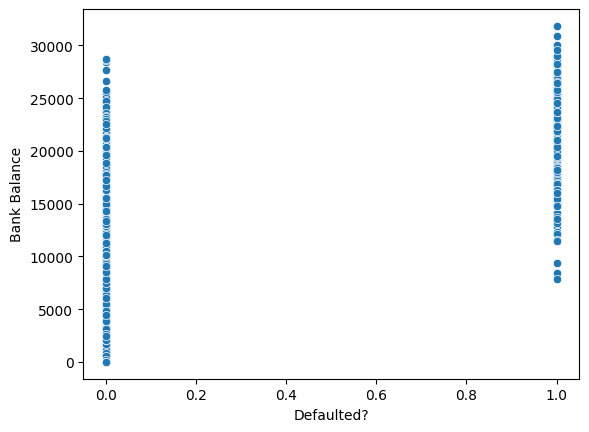

In [9]:
sns.scatterplot(x='Defaulted?',y='Bank Balance',data=df)
plt.show()

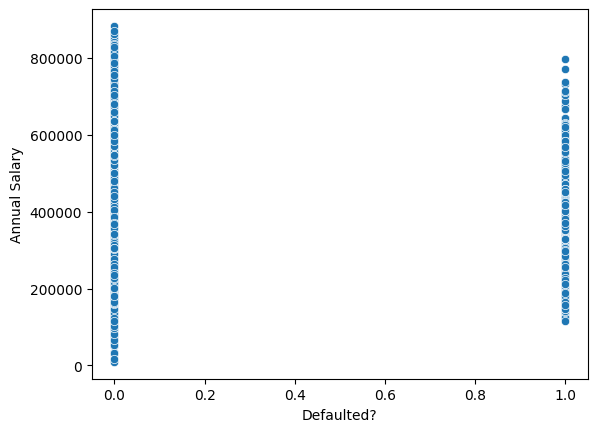

In [10]:
# Visualizing relationship between features
sns.scatterplot(x='Defaulted?', y= 'Annual Salary', data = df)
plt.show()

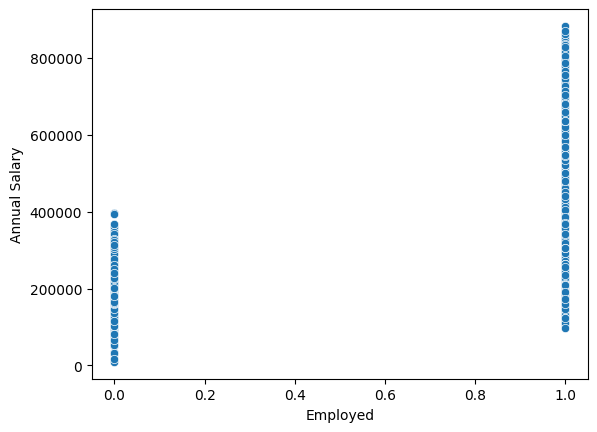

In [12]:
sns.scatterplot(x='Employed',y='Annual Salary',data=df)
plt.show()

Through visual analysis, it is possible to say that those who defaulted have higher bank balance than those who dont.For people having higher bank balance tend to get loans more quickly than the people who dont have higher bank balance..

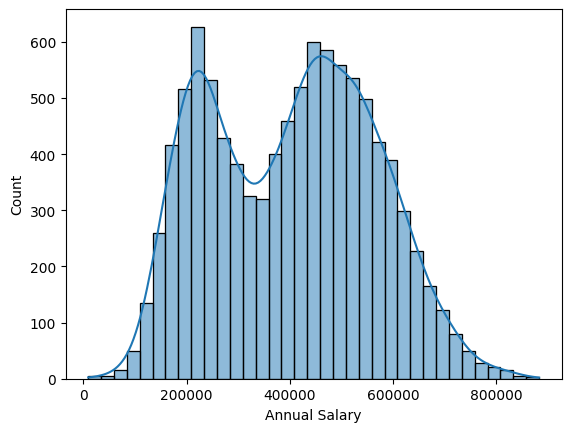

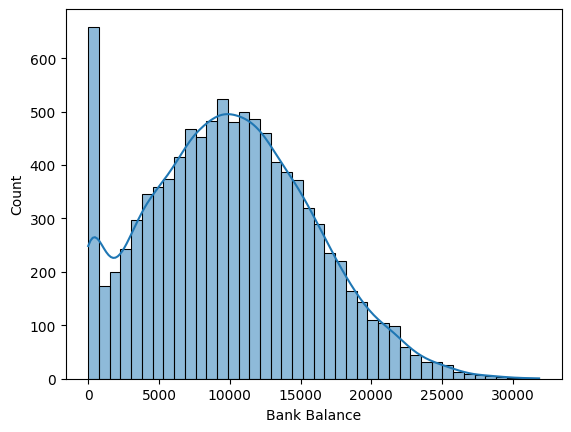

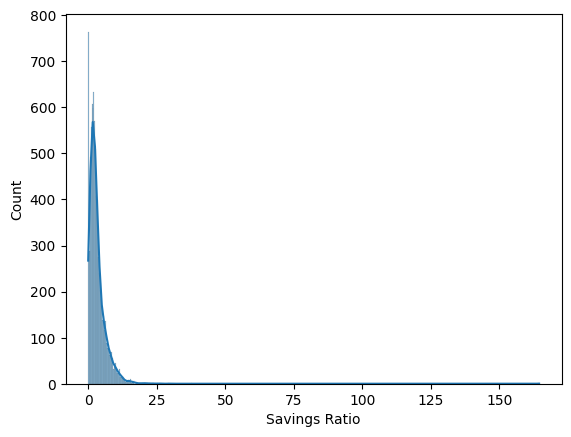

In [13]:
columns=['Annual Salary','Bank Balance','Savings Ratio']
for column in columns:
  sns.histplot(df[column],kde=True)
  plt.show()

Through the histplot analysis it is easy to understand that Annual Salary follows a bimodal distribution wwhich could indicate 2 distinct salary ranges one is for the lower income group and one is for the higher income group

More people have normal to moderate bank balance and very few people have high bank balance

Saving Ratio is also positively skewed indicating very few people have high saving ratio

In [14]:
df.loc[df['Bank Balance'].eq(0)].shape[0]


499

In [21]:
mode = df['Savings Ratio'].mode().iloc[0]  # Get the mode value from the Series
mean = df['Savings Ratio'].mean()
median = df['Savings Ratio'].median()

if mean > median and median > mode:
    print(f'The distribution is positively skewed with mean: {mean}, median: {median}, mode: {mode}')

The distribution is positively skewed with mean: 3.241425626382759, median: 2.430144735602943, mode: 0.0


Note: .iloc[0]: This part is used to retrieve the first value from the Pandas Series obtained from the mode calculation. Since the .mode() function returns a Series, and you want a single value representing the mode, you use .iloc[0] to access the first (and typically the only) value in the result.If there is a tie in a multiple number of modes then the first one will be taken..

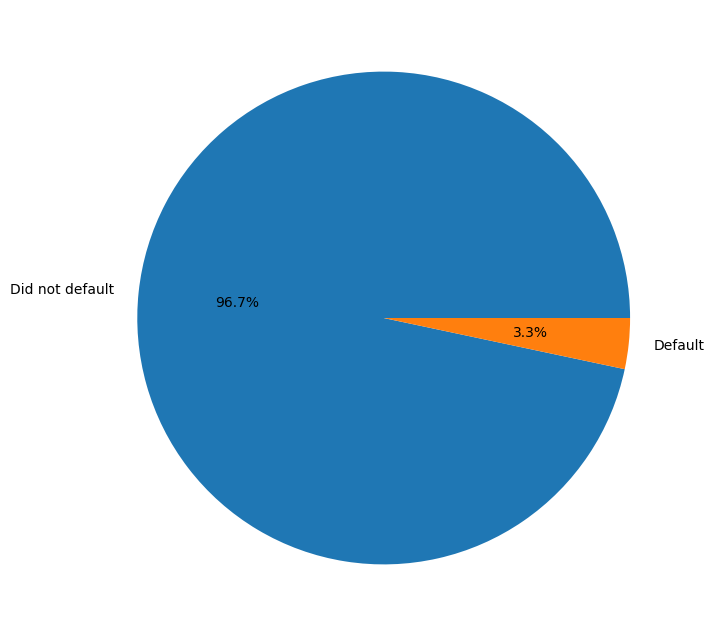

In [23]:
labels = ['Did not default', 'Default']
plt.pie(df['Defaulted?'].value_counts(), labels = labels, autopct = '%.1f%%')
plt.gcf().set_size_inches(8, 8)
plt.show()

6. Testing Models


Here we need to use different classification algorithm and test them our data, The algorithms used will be

1. **Logistic Regression**: It's like a detective that predicts whether something will happen or not (yes or no) based on different clues. If it's really sure, it makes a prediction. For example, it could predict whether an email is spam or not based on the words used.

2. **Ridge Classifier**: This is a smart rule maker that tries not to make rules that are too complicated. It's like a teacher who wants to teach you something without overwhelming you with too many details.(A linear classifier that uses a regularization term to prevent overfitting and improve generalization performance.)

3. **Random Forest Classifier**: Imagine a group of people voting on a decision. Each person is like a mini-expert. They look at a problem and vote on what they think is right. In the end, we combine all their votes to make the best decision.

4. **XGBoost**: It's like a team of experts playing a game. Each player (a decision tree) learns from the mistakes of the previous player. As they play together, they get better at the game, just like a team improving their performance over time.



6.1 No Scaling nor Transforming Data

Usually, some algorithms require standardized or transformed data to achieve better results. We will test different techniques to see how well our models performs on data.

First, we will test performance on our "raw" data, by using them in the original format.

In [25]:
#defining a function to evaluate our classifiers
def evaluate_classifier(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    recall = recall_score(y_test,y_pred)
    print(f'Recall: {recall*100:.2f}%')
    precision = precision_score(y_test,y_pred)
    print(f'Precision: {precision*100:.2f}%')
    f1 = f1_score(y_test,y_pred)
    print(f'F1 Score: {f1*100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['True (Did not default)', 'True (Defaulted)'],
                         columns=['Predicted (Did not default)', 'Predicted (Defaulted)'])
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 15})

In [26]:
#Separating the independent variable and target variables

In [27]:
X=df.drop(columns=['Defaulted?'],axis=1)
y=df["Defaulted?"]

In [28]:
X

,Employed,Bank Balance,Annual Salary,Savings Ratio
Index,,,,
1,1,8754.36,532339.56,1.644507
2,0,9806.16,145273.56,6.750134
3,1,12882.60,381205.68,3.379435
4,1,6351.00,428453.88,1.482307
5,1,9427.92,461562.00,2.042612
...,...,...,...,...
9996,1,8538.72,635908.56,1.342759
9997,1,9095.52,235928.64,3.855200
9998,1,10144.92,703633.92,1.441790


In [29]:
y

Index
1        0
2        0
3        0
4        0
5        0
        ..
9996     0
9997     0
9998     0
9999     0
10000    0
Name: Defaulted?, Length: 10000, dtype: int64

In [30]:
#Splitting training and testing sets
#70% of data will be used for training the algorithm

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,
                                                   random_state = 123,
                                                   shuffle = True,
                                                   stratify = y)

X and y: These are typically your feature matrix (X) and target vector (y). X contains the features or independent variables, and y contains the corresponding target or dependent variable that you want to predict.

train_size = 0.7: This parameter specifies the proportion of the dataset that should be allocated to the training set. In this case, 70% of the data will be used for training, and the remaining 30% will be used for testing.

random_state = 123: This is the seed for the random number generator. Setting a specific random state ensures that the data split will be reproducible. If you use the same random state value in the future, you should get the same data split. This can be helpful for debugging and ensuring consistency.

shuffle = True: This indicates whether or not the data should be shuffled before splitting. Shuffling is typically a good practice to ensure that the data in each split is representative of the entire dataset and doesn't have any specific order-related biases.

stratify = y: The stratify parameter is used when you have imbalanced classes in your target variable y. It ensures that the class distribution in the training and testing sets is similar to the original dataset. In other words, it preserves the relative proportions of different classes in y in both the training and testing sets. This is important to prevent the model from being biased by a skewed class distribution.

Since we're dealing with class imbalance, we must use SMOTE, which is an oversampling technique that will generate synthetic samples of the minority class to balance the class distribution.

In [33]:
y_train.value_counts()

0    6767
1     233
Name: Defaulted?, dtype: int64

In [34]:
smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X_train,y_train)

In [35]:
# Checking class distribution after SMOTE
y_resampled.value_counts()

0    6767
1    6767
Name: Defaulted?, dtype: int64

In [37]:
#Getting the value counts of y_test

In [38]:
value_counts=y_test.value_counts()

In [40]:
#Creating a dataframe from the value_counts
test_values=pd.DataFrame({"Did not default":value_counts[0],"Defaulted":value_counts[1]},index=["Count"])
test_values

,Did not default,Defaulted
Count,2900,100


Accuracy: 68.07%
Recall: 84.00%
Precision: 8.19%
F1 Score: 14.92%


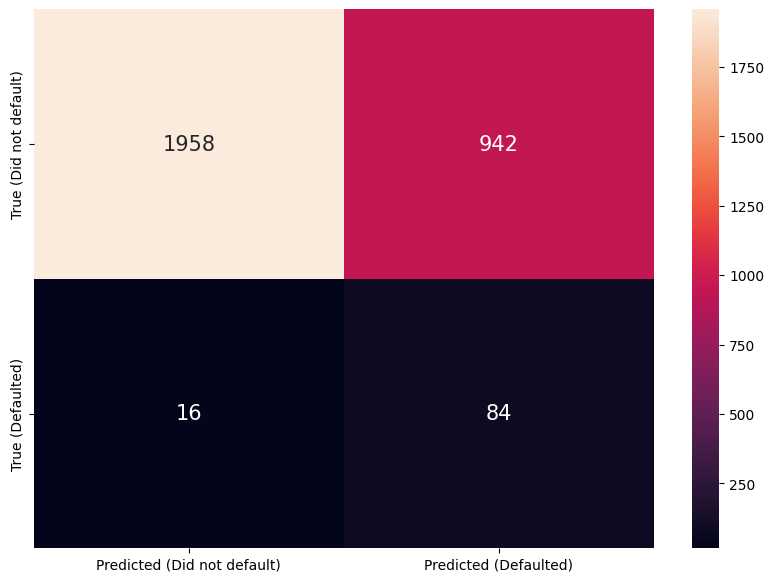

In [41]:
#Evaluating Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_pred=logreg.predict(X_test)
evaluate_classifier(y_test,y_pred)

Note:Model Training: The logreg.fit(X_resampled, y_resampled) line is used to train the logistic regression model. X_resampled and y_resampled are assumed to be the training data after applying a resampling technique to address class imbalance. This resampling is done to ensure that both classes (positive and negative) have a balanced representation in the training data.

Making Predictions: After training, the model is used to make predictions on a separate set of data, which is the test set. X_test contains the features for the test data, and y_pred is used to store the model's predictions for the target variable.

Evaluation: Finally, the code calls a function called evaluate_classifier(y_test, y_pred). This function is likely defined elsewhere in your code and is responsible for evaluating the performance of the logistic regression model on the test data. It calculates various classification metrics such as accuracy, recall, precision, and the F1 score, as well as creates a confusion matrix for further analysis.

Accuracy: 90.60%
Recall: 79.00%
Precision: 23.24%
F1 Score: 35.91%


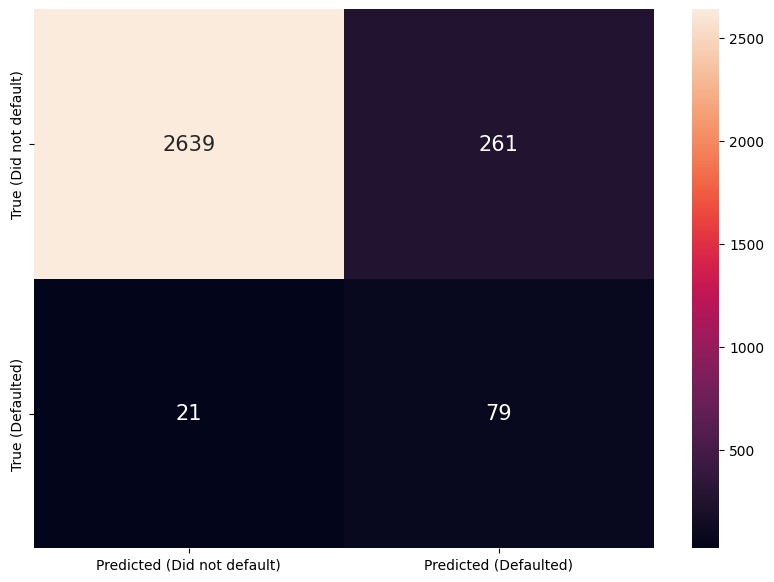

In [42]:
#Evaluating Using the RandomForest
randomforest=RandomForestClassifier(n_estimators=500)
randomforest.fit(X_resampled,y_resampled)
y_pred=randomforest.predict(X_test)
evaluate_classifier(y_test,y_pred)

Note:
Model Initialization: It initializes a Random Forest Classifier with 500 decision trees using RandomForestClassifier(n_estimators=500).

Model Training: The code trains the Random Forest Classifier on the resampled training data (X_resampled and y_resampled) using randomforest.fit(X_resampled, y_resampled).

Making Predictions: The trained model is used to make predictions on the test data (X_test), and the predictions are stored in y_pred.

Evaluation Function: The code then calls an evaluation function, likely defined elsewhere, to assess the model's performance. The function computes metrics like accuracy, recall, precision, and the F1 score and creates a confusion matrix to measure how well the model classifies data.

Overall Purpose: The code's purpose is to train a Random Forest Classifier, evaluate its performance on the test data, and obtain insights into how well it can classify data, particularly in addressing potential class imbalance (implied by mentioning X_resampled and y_resampled).

Accuracy: 90.67%
Recall: 69.00%
Precision: 21.70%
F1 Score: 33.01%


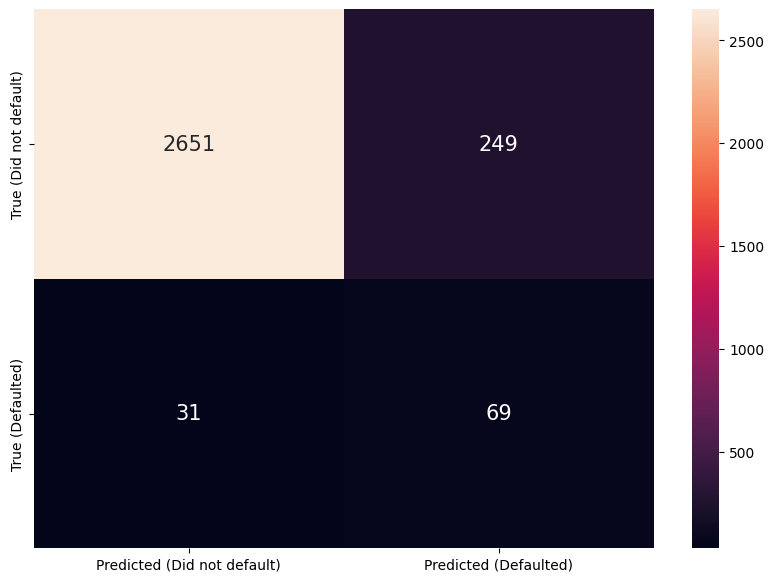

In [43]:
# Evaluating XGBoost
xgbmodel = xgb.XGBClassifier(n_estimators=500)
xgbmodel.fit(X_resampled, y_resampled)
y_pred = xgbmodel.predict(X_test)
evaluate_classifier(y_test, y_pred)

StandardScaler is a preprocessing method in Machine Learning that standardizes features by subtracting the mean of each feature from each value and then dividing the result by the standard deviation of the feature.

StandardScaler reduces the effects of outliers on the model, and ensures that the features are normally distributed and have approximately the same scale, which can help in improving the performance of our classifiers.Using StandardScaler on Data


In [49]:
from sklearn.preprocessing import StandardScaler


# Applying StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


Accuracy: 87.80%
Recall: 85.00%
Precision: 19.50%
F1 Score: 31.72%


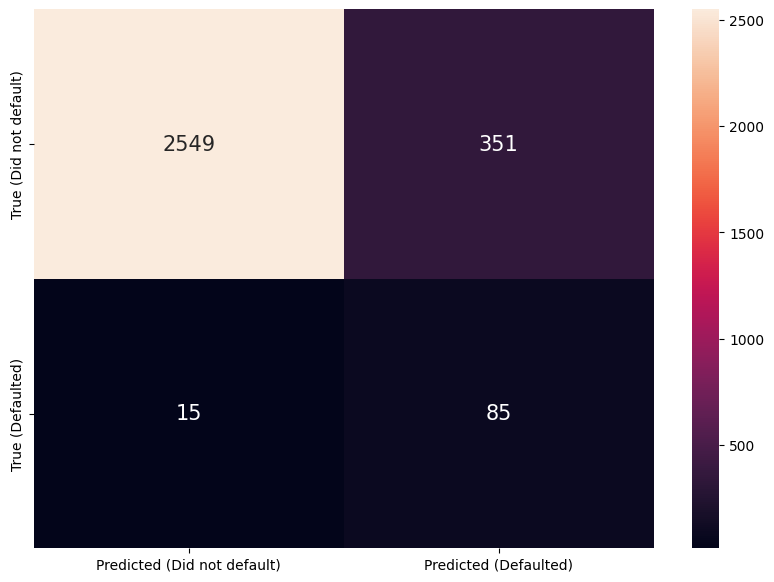

In [50]:
# Evaluating Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test_scaled)
evaluate_classifier(y_test, y_pred)

Accuracy: 85.37%
Recall: 88.00%
Precision: 17.09%
F1 Score: 28.62%


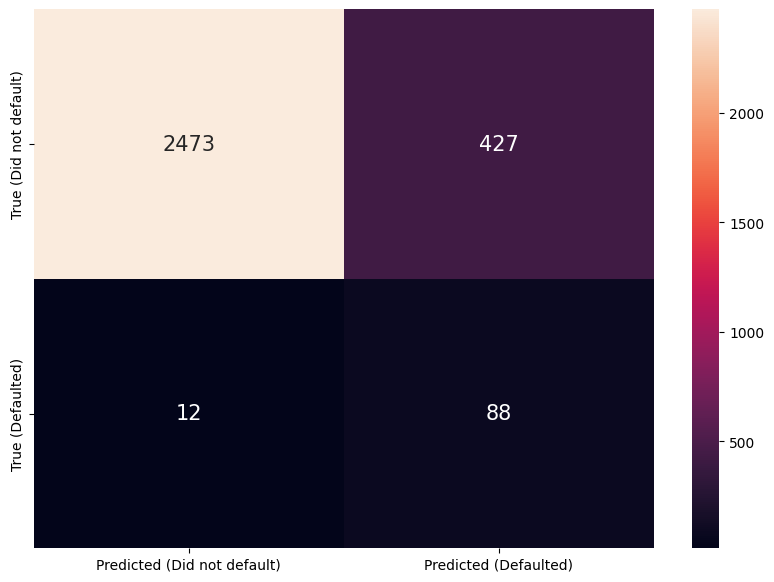

In [51]:
# Evaluating Ridge Classifier
rc = RidgeClassifier()
rc.fit(X_resampled, y_resampled)
y_pred = rc.predict(X_test_scaled)
evaluate_classifier(y_test, y_pred)

Accuracy: 91.00%
Recall: 67.00%
Precision: 22.04%
F1 Score: 33.17%


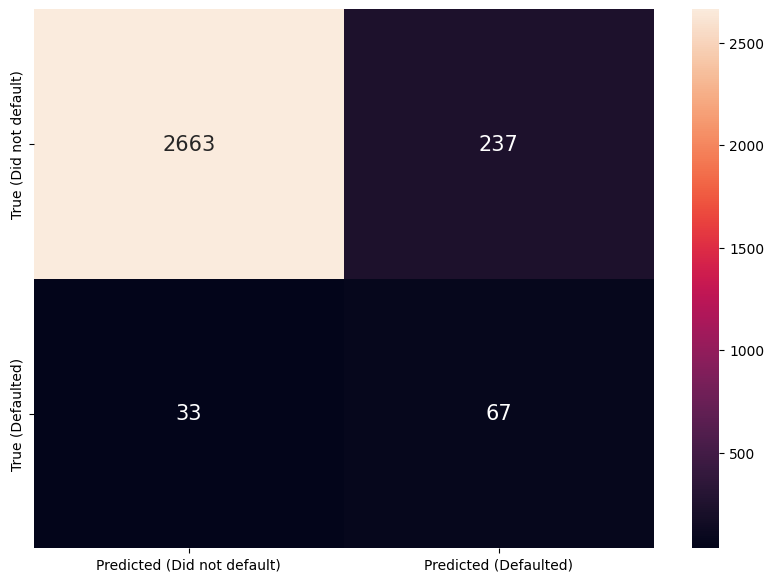

In [52]:
# Evaluating Random Forest
randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(X_resampled, y_resampled)
y_pred = randomforest.predict(X_test_scaled)
evaluate_classifier(y_test, y_pred)

Accuracy: 90.57%
Recall: 66.00%
Precision: 20.95%
F1 Score: 31.81%


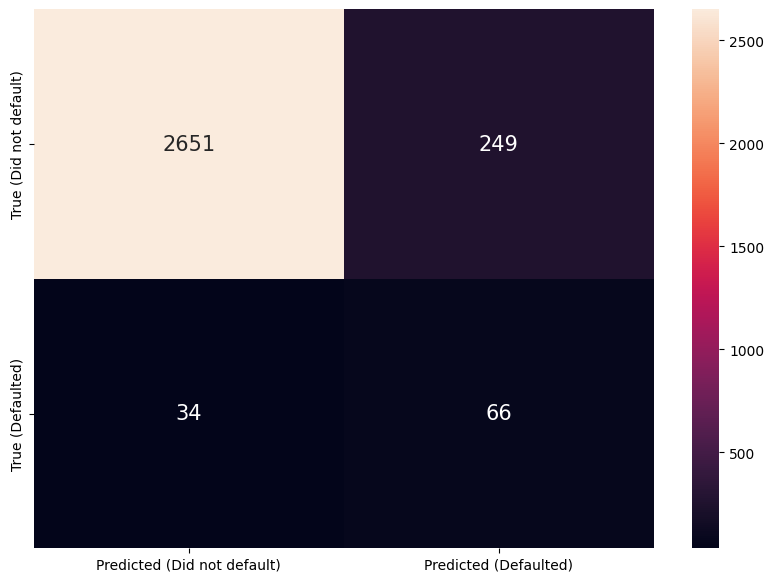

In [53]:
# Evaluating XGBoost
xgbmodel = xgb.XGBClassifier(n_estimators=500)
xgbmodel.fit(X_resampled, y_resampled)
y_pred = xgbmodel.predict(X_test_scaled)
evaluate_classifier(y_test, y_pred)

Using PowerTransformer on Data

PowerTransformer is another preprocessing technique used in Machine Learning to transform skewed data to a normal distribution, helping to stabilize variance and make the data more amenable to modeling.

The Yeo-Johnson transformation is a specific type of power transformation that is used to transform data to a normal or nearly normal distribution and it can handle both positive data, negative data, as well as zero values.

In [54]:
# Using PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

# Applying smote on transformed data
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

Accuracy: 87.63%
Recall: 85.00%
Precision: 19.27%
F1 Score: 31.42%


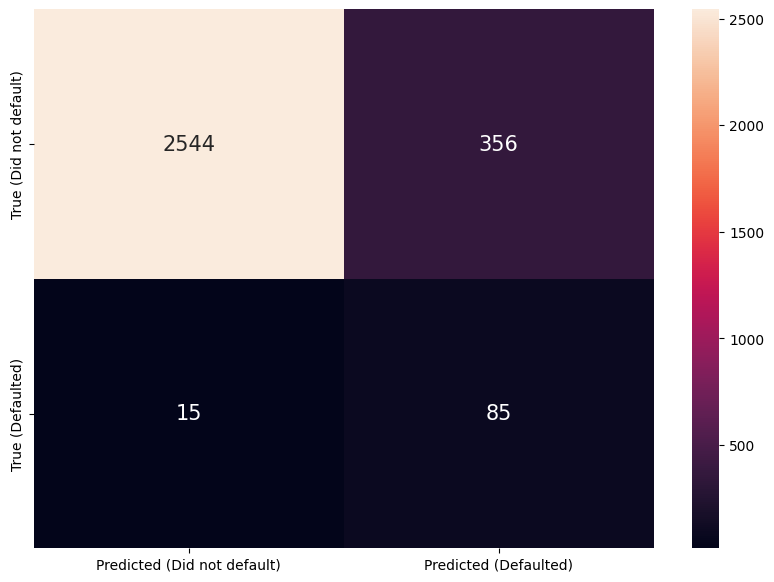

In [55]:
# Evaluating Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test_transformed)
evaluate_classifier(y_test, y_pred)

Accuracy: 82.40%
Recall: 88.00%
Precision: 14.57%
F1 Score: 25.00%


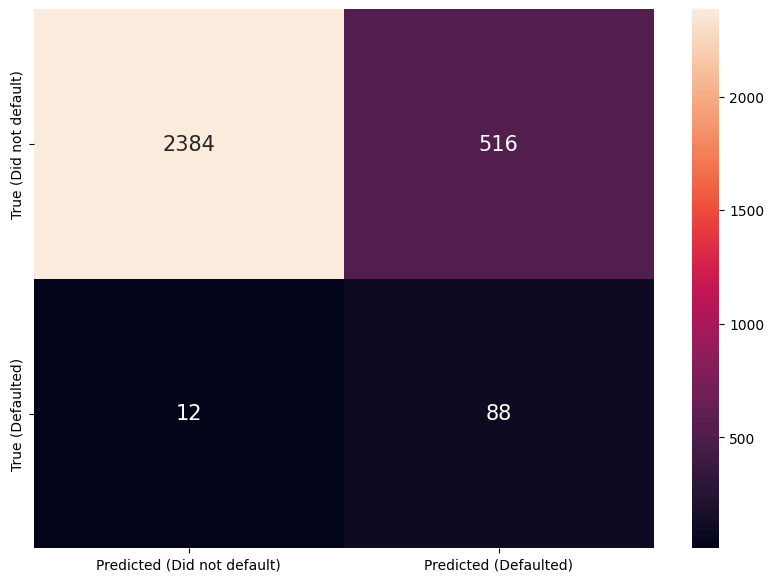

In [56]:
# Evaluating Ridge Classifier
rc = RidgeClassifier()
rc.fit(X_resampled, y_resampled)
y_pred = rc.predict(X_test_transformed)
evaluate_classifier(y_test, y_pred)

Accuracy: 91.30%
Recall: 68.00%
Precision: 22.90%
F1 Score: 34.26%


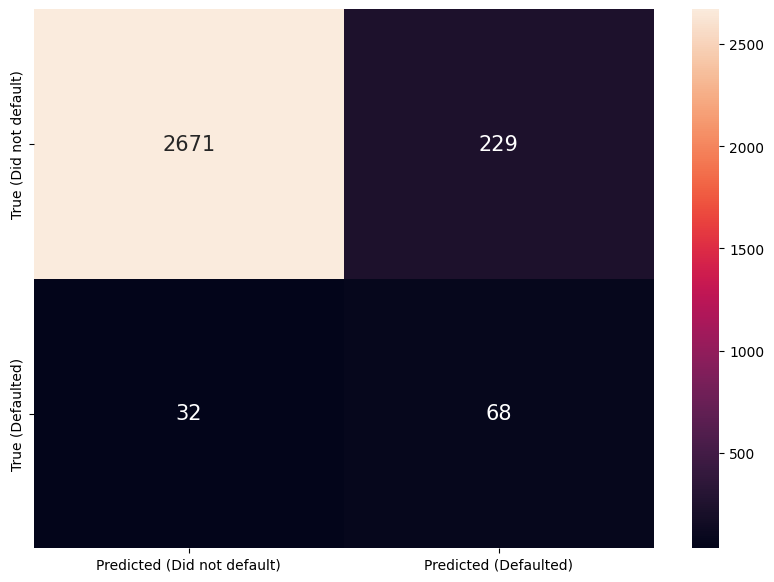

In [57]:
# Evaluating Random Forest
randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(X_resampled, y_resampled)
y_pred = randomforest.predict(X_test_transformed)
evaluate_classifier(y_test, y_pred)

Accuracy: 90.87%
Recall: 65.00%
Precision: 21.38%
F1 Score: 32.18%


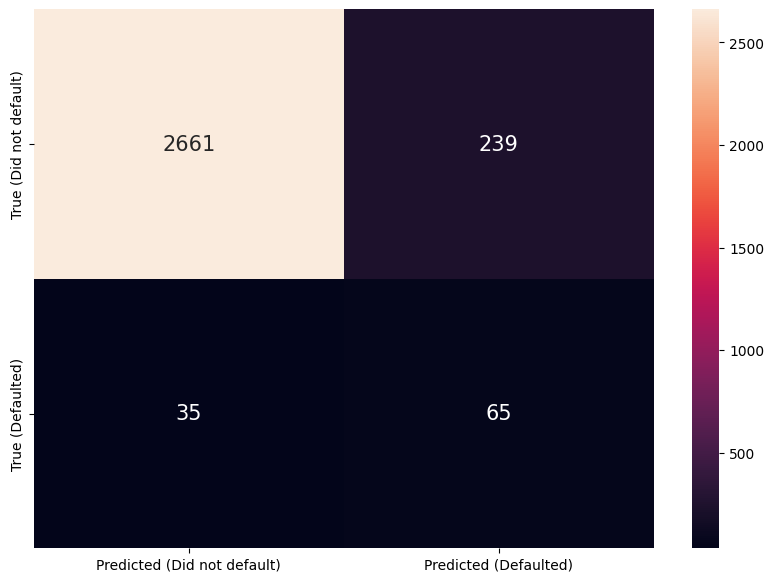

In [58]:
# Evaluating XGBoost
xgbmodel = xgb.XGBClassifier(n_estimators=500)
xgbmodel.fit(X_resampled, y_resampled)
y_pred = xgbmodel.predict(X_test_transformed)
evaluate_classifier(y_test, y_pred)

Note:Feature Coefficients: coefs = rc.coef_.flatten() calculates the coefficients (weights) assigned to each feature by the RidgeClassifier model. These coefficients indicate the strength and direction of the relationship between each feature and the target variable. Positive coefficients mean the feature has a positive impact on the prediction, while negative coefficients mean the feature has a negative impact.

Feature Names: feature_names = list(X.columns) creates a list of feature names. It assumes X is your feature matrix, and .columns is used to obtain the names of the features. This list will be used for labeling the horizontal bars in the plot.

Bar Plot: plt.barh(feature_names, coefs) generates a horizontal bar plot. The feature names are on the vertical axis, and the corresponding coefficients are represented by the horizontal bars. Each bar's length corresponds to the importance or weight of the respective feature in predicting the target variable.

Show the Plot: plt.show() displays the generated plot on your screen.

The resulting plot will give you a visual representation of which features are more influential in the RidgeClassifier's predictions. Features with longer bars have greater importance, while those with shorter bars have less influence. This can be valuable for feature selection and understanding which aspects of your data are most relevant to the classification task.

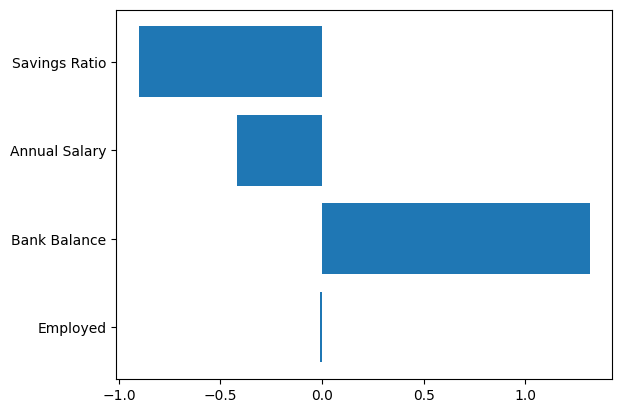

In [60]:
# Plotting Feature Importance plot for RidgeClassifier
# It shows us which one of the feature is being the considered the most relevant
# to predict the target variable, according to the algorithm
coefs = rc.coef_.flatten()
feature_names = list(X.columns)
plt.barh(feature_names, coefs)
plt.show()

Conclusions
When using Machine Learning to predict the likelihood of loan default, it's crucial to minimize the risk of lending money to customers who may not repay it. To achieve this, accurate identification of potential defaulters is essential while keeping the number of false negatives (those mistakenly classified as non-defaulters when they are) as low as possible.

The Ridge Classifier, applied to the original data, effectively minimized false negatives, correctly identifying 88% of defaulters. Subsequently, the Random Forest model, applied after data standardization, achieved the lowest number of false positives (misclassifying non-defaulters as defaulters) and the highest overall accuracy score (90.97%).